In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_csv("feature_engineered_greenpulse.csv")

# Set dark green theme
plt.style.use("dark_background")
sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "#0B2012",
    "figure.facecolor": "#0B2012",
    "grid.color": "#1D3B2A",
    "axes.edgecolor": "#2C5234",
    "axes.labelcolor": "#C8E6C9",
    "text.color": "#A5D6A7",
    "xtick.color": "#81C784",
    "ytick.color": "#81C784"
})

main_color = "#4CAF50"
highlight_color = "#00E676"


In [3]:

# 1. Basic dataset info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nSummary:\n", df.describe())



Shape: (5616, 37)

Columns:
 ['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023', 'subnational2', 'tree_cover_loss_total', 'loss_gain_ratio', 'loss_extent_ratio', 'gain_extent_ratio', 'GDI', 'GDI_Category']

Summary:
        country  subnational1   threshold       area_ha  extent_2000_ha  \
count   5616.0   5616.000000  5616.00000  5.616000e+03    5.616000e+03   
mean       0.0     18.837607    28.12500  8.982326e+05    2.068563e+05   
std        0.0     10.507173    22.49332  2.838490e+06    1.095839e

In [6]:

# 1️⃣ Tree Cover Extent Comparison (2000 vs 2010)
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='extent_2000_ha',
    y='extent_2010_ha',
    data=combined,
    color='limegreen',
    alpha=0.7,
    edgecolor='black'
)
plt.title("🌳 Tree Cover Extent: 2000 vs 2010", fontsize=14, color='lightgreen')
plt.xlabel("Tree Cover Extent (2000) [ha]")
plt.ylabel("Tree Cover Extent (2010) [ha]")
plt.grid(alpha=0.3, color='green')
plt.show()


NameError: name 'combined' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, cmap="Greens", linewidths=0.3)
plt.title("Correlation Heatmap", fontsize=14, color=highlight_color)
plt.show()



In [ ]:


# 4. GDI Category distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='GDI_Category', palette="Greens_r", edgecolor="black")
plt.title("GDI Category Distribution", fontsize=14, color=highlight_color)
plt.xlabel("GDI Category", color="#A5D6A7")
plt.ylabel("Count", color="#A5D6A7")
plt.xticks(rotation=10)
plt.show()



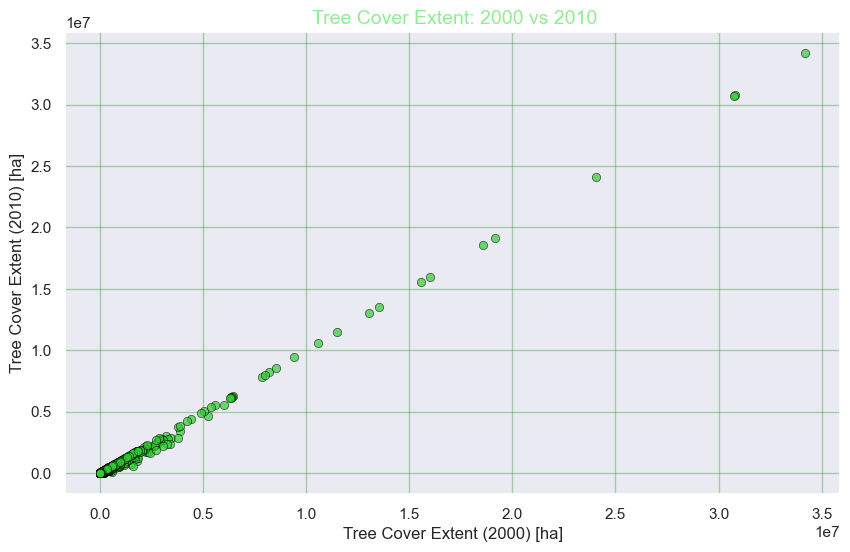

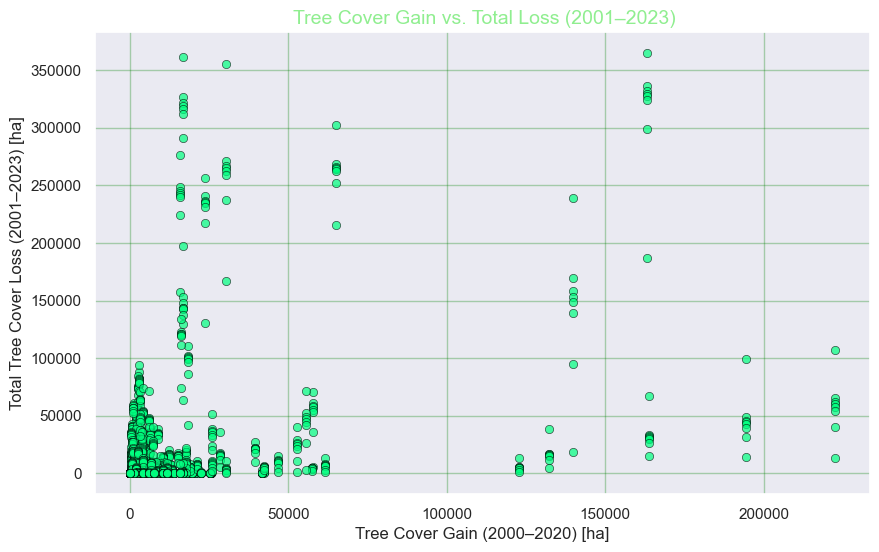

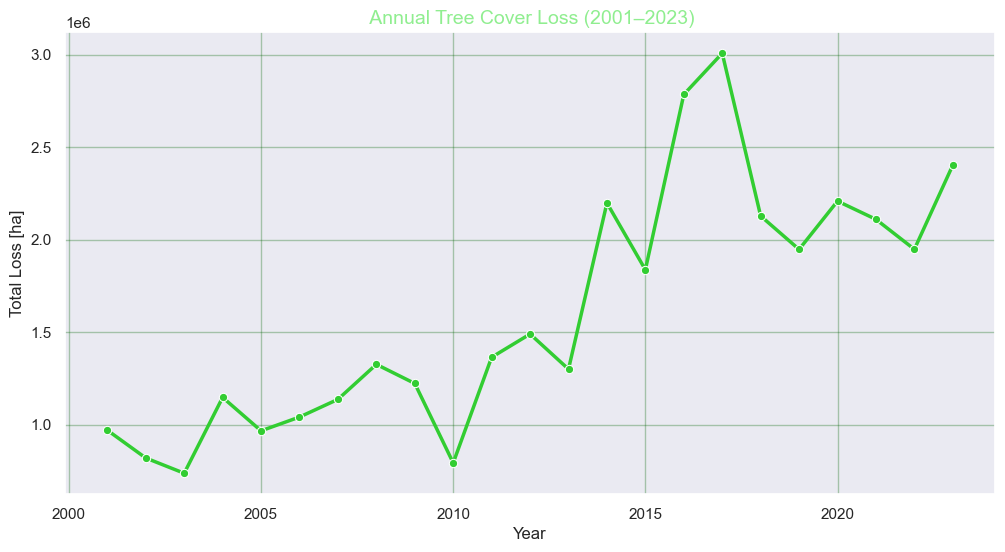

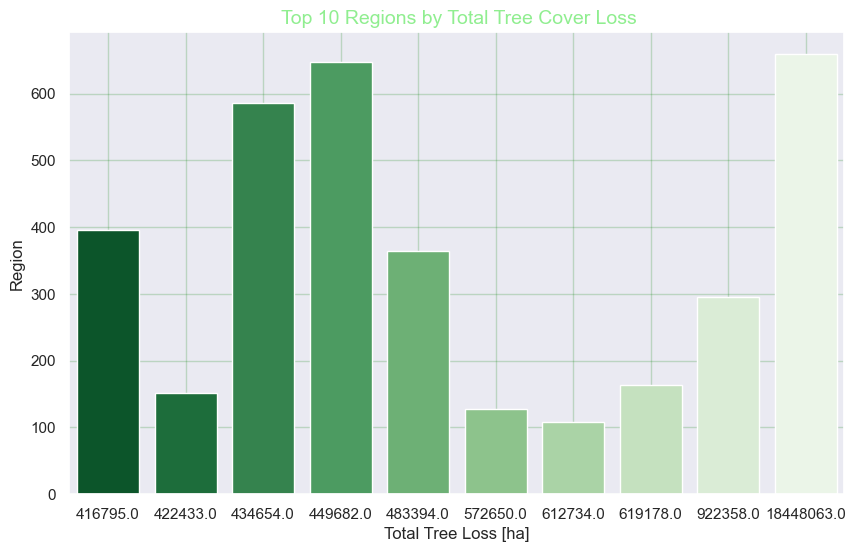

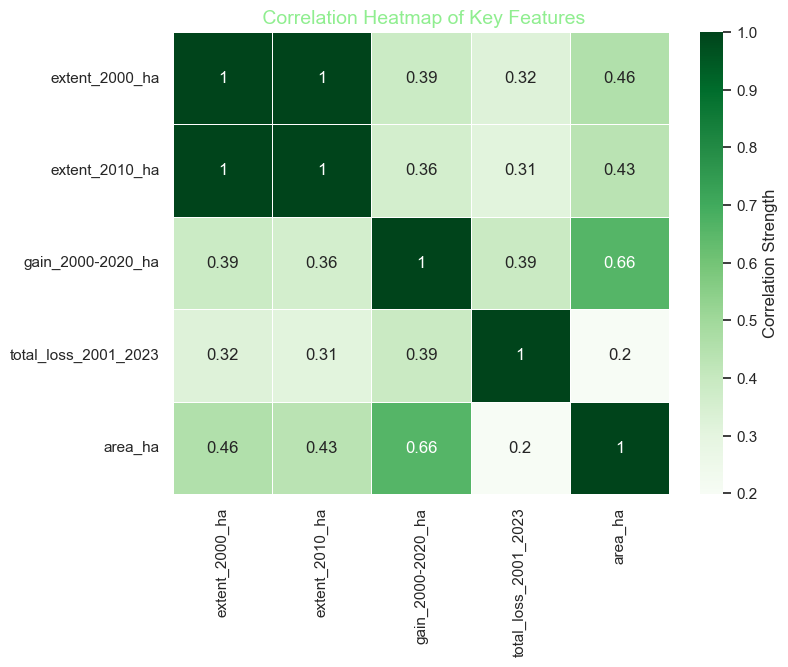

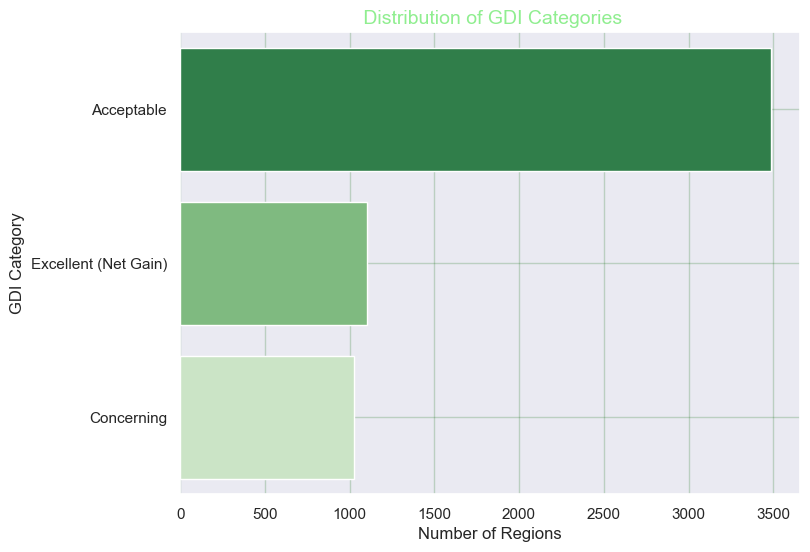

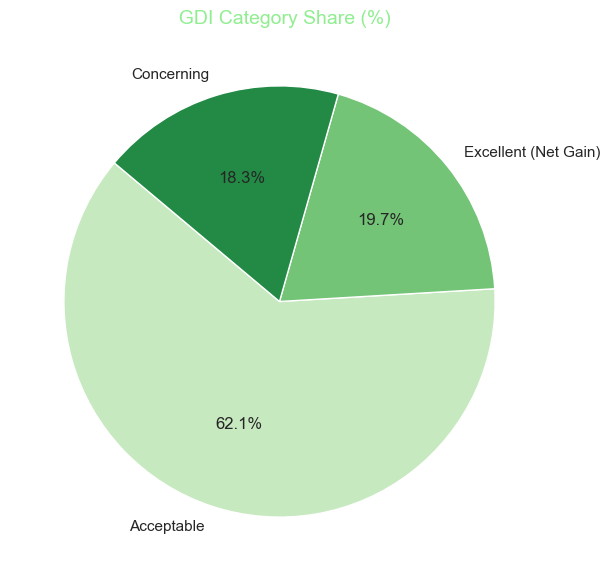

In [11]:
# ======================================================
# 🌳 Visualization Suite (Dark Green Theme)
# ======================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed dataset
# (If it's already loaded earlier, skip this)
combined = pd.read_csv("feature_engineered_greenpulse.csv")


plt.style.use('dark_background')
sns.set_style("darkgrid")
sns.set_palette("Greens_d")


# 1 Tree Cover Extent Comparison (2000 vs 2010)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='extent_2000_ha',
    y='extent_2010_ha',
    data=combined,
    color='limegreen',
    alpha=0.7,
    edgecolor='black'
)
plt.title(" Tree Cover Extent: 2000 vs 2010", fontsize=14, color='lightgreen')
plt.xlabel("Tree Cover Extent (2000) [ha]")
plt.ylabel("Tree Cover Extent (2010) [ha]")
plt.grid(alpha=0.3, color='green')
plt.show()


# 2 Tree Cover Gain vs Total Loss (2001–2023)

# Compute total loss if not present
loss_cols = [col for col in combined.columns if "tc_loss_ha_" in col]
combined["total_loss_2001_2023"] = combined[loss_cols].sum(axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='gain_2000-2020_ha',
    y='total_loss_2001_2023',
    data=combined,
    color='springgreen',
    alpha=0.7,
    edgecolor='black'
)
plt.title(" Tree Cover Gain vs. Total Loss (2001–2023)", fontsize=14, color='lightgreen')
plt.xlabel("Tree Cover Gain (2000–2020) [ha]")
plt.ylabel("Total Tree Cover Loss (2001–2023) [ha]")
plt.grid(alpha=0.3, color='green')
plt.show()


# 3️ Annual Loss Trend (2001–2023)

annual_loss = combined[loss_cols].sum().reset_index()
annual_loss.columns = ["Year", "Loss_ha"]
annual_loss["Year"] = annual_loss["Year"].str.extract("(\d+)").astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(
    x='Year',
    y='Loss_ha',
    data=annual_loss,
    color='limegreen',
    linewidth=2.5,
    marker='o'
)
plt.title(" Annual Tree Cover Loss (2001–2023)", fontsize=14, color='lightgreen')
plt.xlabel("Year")
plt.ylabel("Total Loss [ha]")
plt.grid(alpha=0.3, color='darkgreen')
plt.show()


# 4 Regional Loss Distribution (Top 10 subnational2)

top_regions = combined.groupby("subnational2")["total_loss_2001_2023"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_regions.values,
    y=top_regions.index,
    palette="Greens_r"
)
plt.title(" Top 10 Regions by Total Tree Cover Loss", fontsize=14, color='lightgreen')
plt.xlabel("Total Tree Loss [ha]")
plt.ylabel("Region")
plt.grid(alpha=0.2, color='green')
plt.show()


# 5️ Correlation Heatmap (Key features)

corr_features = ["extent_2000_ha", "extent_2010_ha", "gain_2000-2020_ha", "total_loss_2001_2023", "area_ha"]
corr = combined[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="Greens",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Strength'}
)
plt.title(" Correlation Heatmap of Key Features", fontsize=14, color='lightgreen')
plt.show()


# 6 Green Deficit Index (GDI) Category Distribution


if "GDI_Category" in combined.columns:
    plt.figure(figsize=(8,6))
    category_counts = combined["GDI_Category"].value_counts().reset_index()
    category_counts.columns = ["GDI_Category", "Count"]

    sns.barplot(
        y="GDI_Category",
        x="Count",
        data=category_counts,
        palette="Greens_r"
    )

    plt.title(" Distribution of GDI Categories", fontsize=14, color='lightgreen')
    plt.xlabel("Number of Regions")
    plt.ylabel("GDI Category")
    plt.grid(alpha=0.2, color='darkgreen')
    plt.show()

    # Optional pie chart version
    plt.figure(figsize=(7,7))
    plt.pie(
        category_counts["Count"],
        labels=category_counts["GDI_Category"],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Greens", len(category_counts))
    )
    plt.title("  GDI Category Share (%)", color='lightgreen', fontsize=14)
    plt.show()
else:
    print(" 'GDI_Category' column not found. Please compute GDI before running this visualization.")

